In [48]:
import warnings
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO    
# import pydotplus
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import mixture
%matplotlib inline


In [49]:
balance_data = pd.read_csv("test_dec (4).csv")


In [144]:
df=balance_data[['CROP', 'REGION', 'SOWING_TIME', 'Average Soil_pH','SOIL_TYPE']].copy()
print(df.head(10))
df.shape

    CROP          REGION SOWING_TIME  Average Soil_pH           SOIL_TYPE
0  Bajra  Andhra Pradesh        June              6.5  black cotton soil 
1  Bajra  Andhra Pradesh        June              6.5  black cotton soil 
2  Bajra  Andhra Pradesh        July              6.5  black cotton soil 
3  Bajra  Andhra Pradesh     January              6.5  black cotton soil 
4  Bajra  Andhra Pradesh    February              6.5  black cotton soil 
5  Bajra  Andhra Pradesh       March              6.5  black cotton soil 
6  Bajra  Andhra Pradesh        June              6.5  black cotton soil 
7  Bajra  Andhra Pradesh        June              6.5  black cotton soil 
8  Bajra  Andhra Pradesh        July              6.5  black cotton soil 
9  Bajra  Andhra Pradesh     January              6.5  black cotton soil 


(12828, 5)

# cleaning the data

In [51]:
df['CROP']=df['CROP'].str.lower()
df['REGION']=df['REGION'].str.lower()
df['SOWING_TIME']=df['SOWING_TIME'].str.lower()

df['SOIL_TYPE']=df['SOIL_TYPE'].str.lower()

In [52]:
df.head()


,CROP,REGION,SOWING_TIME,Average Soil_pH,SOIL_TYPE
0,bajra,andhra pradesh,june,6.5,black cotton soil
1,bajra,andhra pradesh,june,6.5,black cotton soil
2,bajra,andhra pradesh,july,6.5,black cotton soil
3,bajra,andhra pradesh,january,6.5,black cotton soil
4,bajra,andhra pradesh,february,6.5,black cotton soil


In [53]:
df.isnull().sum()

CROP                 0
REGION               0
SOWING_TIME        392
Average Soil_pH      0
SOIL_TYPE            0
dtype: int64

In [54]:
df.fillna("whole year", inplace = True)

In [55]:
df.isnull().sum()

CROP               0
REGION             0
SOWING_TIME        0
Average Soil_pH    0
SOIL_TYPE          0
dtype: int64

In [56]:
df = df.replace(to_replace ='rice ', value = 'rice', regex = True)

save_crop=df["CROP"].unique()
crop_dict={}
count=1
for i in save_crop:
  crop_dict[i]=count
  count=count+1

print(crop_dict)



{'bajra': 1, 'jowar': 2, 'lentil': 3, 'horse gram': 4, 'wheat': 5, 'rice': 6, 'red gram': 7, 'ragi': 8, 'oat': 9, 'mungbean': 10, 'maize': 11, 'kidney beans': 12, 'black eyed beans': 13, 'black gram': 14, 'barley': 15, 'cotton': 16, 'jute': 17, 'ricinus (castor)': 18, 'sugarcane': 19, 'lily': 20, 'lotus': 21, 'jasmine': 22, 'petunia': 23, 'rose': 24, 'safflower': 25, 'sunflower': 26, 'zennia': 27, 'peach': 28, 'apple': 29, 'apricot': 30, 'avocado': 31, 'banana': 32, 'barbados cherry': 33, 'cashew trees': 34, 'cherry': 35, 'chikoo': 36, 'cucumber': 37, 'custard apple': 38, 'date palm': 39, 'dragon fruit': 40, 'fig': 41, 'grapes': 42, 'guava': 43, 'jackfruit': 44, 'kiwi': 45, 'lemon': 46}


In [58]:
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='february', value = 'feb',regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='june ', value = 'june', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='april ', value = 'april', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='december ', value = 'december', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='october ', value = 'october', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='april  ', value = 'april', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='july ', value = 'july', regex = True)  
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='october  ', value = 'october', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='feb', value = 'february',regex = True)

save_sowing=df["SOWING_TIME"].unique()
sowing_dict={}
count=1
for i in save_sowing:
  sowing_dict[i]=count
  count=count+1

print(sowing_dict)

{'june': 1, 'july': 2, 'january': 3, 'february': 4, 'march': 5, 'august': 6, 'september': 7, 'october': 8, 'november': 9, 'december': 10, 'may': 11, 'april': 12, 'whole year': 13, 'year long': 14, 'rainy season': 15}


In [59]:

df["SOIL_TYPE"] = df["SOIL_TYPE"].replace(to_replace ='black cotton soil\xa0', value = 'black cotton soil', regex = True)
df["SOIL_TYPE"] = df["SOIL_TYPE"].replace(to_replace ='clay loam,clayey,loamy \n', value = 'clay loam,clayey,loamy', regex = True)
df["SOIL_TYPE"] = df["SOIL_TYPE"].replace(to_replace ='nutrient-rich\xa0loamy\xa0soil / water gardens', value = 'nutrient rich loamy soil,water gardens', regex = True)
df["SOIL_TYPE"] = df["SOIL_TYPE"].replace(to_replace ='sandy-loam, red-loam, silt-loam\xa0soils', value = 'sandy-loam, red-loam, silt-loam soils', regex = True)
df["SOIL_TYPE"] = df["SOIL_TYPE"].replace(to_replace ='light sandy to heavy clay/ well drained loamy soil', value = 'light sandy to heavy clay,well drained loamy soil', regex = True)
df["SOIL_TYPE"] = df["SOIL_TYPE"].replace(to_replace ='clay loam,clayey,loamy ', value = 'clay loam,clayey,loamy', regex = True)


save_soil=df["SOIL_TYPE"].unique()
soil_dict={}
count=1
for i in save_soil:
  soil_dict[i]=count
  count=count+1

print(soil_dict)


{'black cotton soil': 1, 'clayey loam soil': 2, 'light black soil': 3, 'calcareous alluvial soil': 4, 'lateritic and black cotton soils': 5, 'clay loam': 6, 'fertile, riverine and alluvial': 7, 'clay loam,clayey,loamy': 8, 'loamy, alluvial': 9, 'alluvial': 10, 'well drained loams': 11, 'red lateritic ': 12, 'well drained, loamy ': 13, 'well drained, aerated deep-loams and silt loams': 14, 'light sandy to heavy clay,well drained loamy soil': 15, 'red sandy and loamy soils': 16, 'black soils': 17, 'laterite, medium and alluvial soils': 18, 'low organic carbon content and hilly sandy loam soil': 19, 'stiff loamy or heavy soils,black cotton soils or brown alluviums': 20, 'sandy loam, loam and sodic, light & saline soil': 21, 'deep black': 22, 'loamy , aluvial soils': 23, 'deep , sandy loam soils': 24, 'well drained , deep loam': 25, 'sandy loam soil': 26, 'nutrient rich loamy soil,water gardens': 27, 'well-drained, rich loamy soil': 28, 'light sandy soil': 29, 'sandy-loam, red-loam, silt-l

In [60]:
df["REGION"] = df["REGION"].replace(to_replace ='orissa ', value = 'orissa', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='himacha', value = 'himacha pradesh', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='orrissa', value = 'orissa', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='kerela', value = 'kerala', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='gujrat', value = 'gujarat', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='chattisgarh', value = 'chhattisgarh', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='jammu & kashmir', value = 'jammu and kashmir', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='maharashtra ', value = 'maharashtra', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='uttarakhand', value = 'uttrakhand', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='maharasthra', value = 'maharashtra', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='haryana ', value = 'haryana', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='puducherry (pondicherry)', value = 'pondicherry', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='andaman nicobar', value = 'andaman and nicobar islands', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='andaman & nicobar islands', value = 'andaman and nicobar islands', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='puducherry (pondicherry)', value = 'pondicherry', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='orrisa', value = 'orissa', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='chhatisgarh', value = 'chhattisgarh', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='chittaurgarh', value = 'chhattisgarh', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='karnataka ', value = 'karnataka', regex = True)
df["REGION"] = df["REGION"].replace(to_replace ='madhya pradesh  ', value = 'madhya pradesh', regex = True)



save_region=df["REGION"].unique()
region_dict={}
count=1
for i in save_region:
  region_dict[i]=count
  count=count+1

print(region_dict)

{'andhra pradesh': 1, 'gujarat': 2, 'haryana ': 3, 'karnataka': 4, 'madhya pradesh': 5, 'maharashtra': 6, 'orissa': 7, 'rajasthan ': 8, 'uttar pradesh ': 9, 'tamil nadu': 10, 'punjab': 11, 'delhi': 12, 'andra pradesh': 13, 'bihar': 14, 'haryana': 15, 'rajasthan': 16, 'up': 17, 'uttrakhand': 18, 'west bengal': 19, 'telangana': 20, 'assam': 21, 'chhattisgarh': 22, 'himacha pradeshl': 23, 'jammu and kashmir': 24, 'madya pradesh': 25, 'uttar pradesh': 26, 'odisha': 27, 'jharkhand': 28, 'himacha pradeshl pradesh': 29, 'east madhya pradesh': 30, 'east uttar pradesh': 31, 'kerala': 32, 'goa': 33, 'tripura': 34, 'north india': 35, 'uttranchal': 36, 'punjab ': 37, 'rajashtan': 38, 'manipur': 39, 'maharshtra': 40, 'hyderabad': 41, 'arunachal pradesh': 42, 'meghalaya': 43, 'mizoram': 44, 'nagaland': 45, 'sikkim': 46, 'andaman and nicobar islands': 47, 'chandigarh': 48, 'dadar and nagar haveli': 49, 'daman and diu': 50, 'lakshadweep': 51, 'puducherry (pondicherry)': 52, 'hilly areas': 53, 'kolkata

Text(0.5, 1.0, 'SOWING TIME OF CROPS')

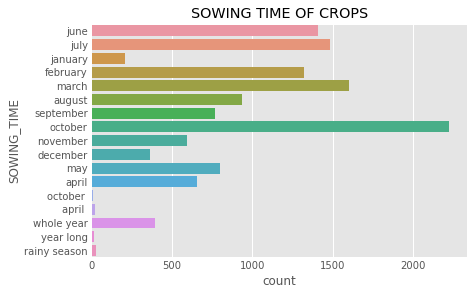

In [273]:
ax = sns.countplot(y = 'SOWING_TIME', data = df)

ax.set_title("SOWING TIME OF CROPS")

Text(0.5, 1.0, 'CROPS')

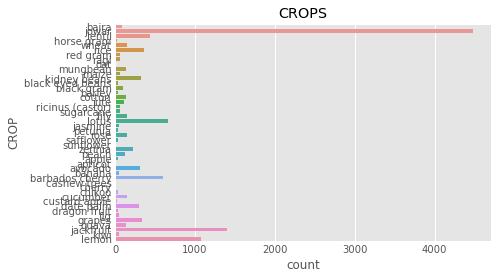

In [62]:
ax = sns.countplot(y = 'CROP', data = df)

ax.set_title("CROPS")

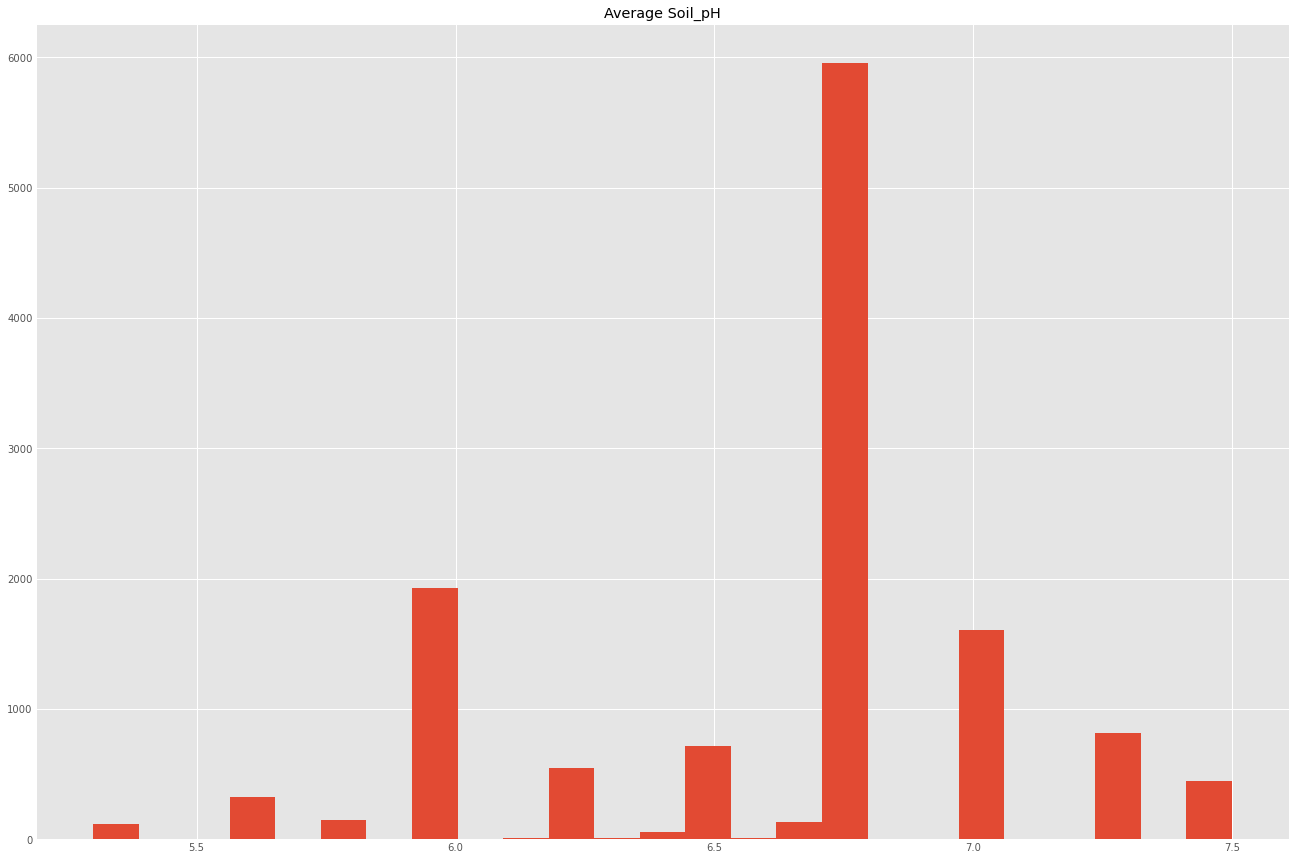

In [152]:
 
df.hist(bins = 25, figsize = (20,15))
plt.show()

#most of the crops are grown in between 6.5-7.0 ph

In [63]:
#CROP 

#save_crop=df["CROP"].unique()
#crop_dict={}
#count=1
#for i in save_crop:
#  crop_dict[i]=count
#  count=count+1

#print(crop_dict)



#REGION 
#save_region=df["REGION"].unique()
#region_dict={}
#count=1
#for i in save_region:
#  region_dict[i]=count
#  count=count+1

#print(region_dict)

#SOWING TIME 

#save_sowing=df["SOWING_TIME"].unique()
#sowing_dict={}
#count=1
#for i in save_sowing:
#  sowing_dict[i]=count
#  count=count+1

#print(sowing_dict)

#ph
save_soilph=df["Average Soil_pH"].unique()
soilph_dict={}
count=1
for i in save_soilph:
  soilph_dict[i]=count
  count=count+1


#SOIL TYPE

#save_soil=df["SOIL_TYPE"].unique()
#soil_dict={}
#count=1
#for i in save_soil:
#  soil_dict[i]=count
#  count=count+1

#print(soil_dict)


In [64]:
#REPLACING THE VALUES GOT IN THE DICTIONARY & REAL VALUES 
c=0

#crop ka 
for i in crop_dict:
  df=df.replace(to_replace=i,value=crop_dict[i])
  
#region ka 
for i in region_dict:
  df=df.replace(to_replace=i,value=region_dict[i])

#sowing ka 

for i in sowing_dict:
  df=df.replace(to_replace=i,value=sowing_dict[i])

#soil type ka 
for i in soil_dict:
  df=df.replace(to_replace=i,value=soil_dict[i])
df.head()

,CROP,REGION,SOWING_TIME,Average Soil_pH,SOIL_TYPE
0,1,1,1,6.5,1
1,1,1,1,6.5,1
2,1,1,2,6.5,1
3,1,1,3,6.5,1
4,1,1,4,6.5,1


# using  algorithms

In [65]:
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0]
    Y=Y.astype('int')
    X=X.astype('int')
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  X, Y, test_size = 0.2, random_state = 100) 
    
    return X, Y, X_train, X_test, y_train, y_test

In [66]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(df) 

In [67]:
type(X_train),type(y_train)

y_train.shape,X_train.shape

((10262,), (10262, 4))

In [68]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction_RF = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
a1=acc_random_forest = float(round(random_forest.score(X_train, y_train) * 100, 2))
print(acc_random_forest)

99.93


In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_LR = logreg.predict(X_test)

a2=acc_log = float(round(logreg.score(X_train, y_train) * 100, 2))
print(acc_log)

64.47


In [70]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred_KNN = knn.predict(X_test)
a3=acc_knn = float(round(knn.score(X_train, y_train) * 100, 2))
print(acc_knn)

99.01


In [71]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train) 
Y_pred_GNB = gaussian.predict(X_test)
a4=acc_gaussian = float(round(gaussian.score(X_train, y_train) * 100, 2))
print(acc_gaussian)

99.09


In [72]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred_SVC = linear_svc.predict(X_test)

a5=acc_linear_svc = float(round(linear_svc.score(X_train, y_train) * 100, 2))
print(acc_linear_svc)

54.39


In [73]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_DT = decision_tree.predict(X_test)
a6=acc_decision_tree = float(round(decision_tree.score(X_train, y_train) * 100, 2))
print(acc_decision_tree)

99.93


In [74]:
import pickle

In [76]:
pickle.dump(random_forest, open("random_forest.sav", "wb"))

model = pickle.load(open('random_forest.sav','rb'))
q=model.predict([[5,6,7,6]])
q

array([7])

In [77]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(random_forest, X_train, y_train,scoring ='accuracy', cv=5)
results2 = cross_val_score(logreg, X_train, y_train,scoring ='accuracy', cv=5)
results3 = cross_val_score(knn, X_train, y_train,scoring ='accuracy', cv=5)
results4 = cross_val_score(gaussian,X_train, y_train,scoring ='accuracy', cv=5)
results5 = cross_val_score(linear_svc, X_train, y_train,scoring ='accuracy', cv=5)


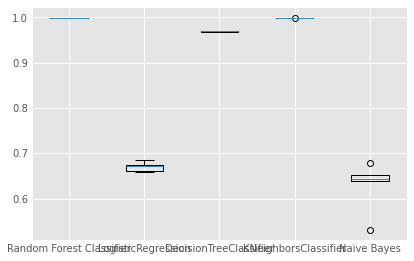

In [30]:
box_plot_data=[results1,results2,results3,results4,results5]

plt.boxplot(box_plot_data,labels=['Random Forest Classifier','LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','Naive Bayes'])
plt.show()

In [31]:
# model = pickle.load(open('knn.pkl','rb'))
# print(model.predict([[2,3,6.75,1]]))

In [99]:
from sklearn.ensemble import VotingClassifier

model_hard = VotingClassifier(estimators=[('rf',random_forest), ('LR', logreg),('GNB', gaussian),('DT', decision_tree),('KNN', knn)], voting='hard')


In [100]:
model_hard

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('LR', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [101]:
model_hard.fit(X_train,y_train)
# model.score(X_test,y_test)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('LR', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [102]:
ans_pred=model_hard.predict(X_test)

In [150]:
score_ensemble = accuracy_score(y_test, ans_pred)*100
score_ensemble 

pickle.dump(model_hard , open("model_hard.pkl", "wb"))



model = pickle.load(open('model_hard.pkl','rb'))
q=model.predict([[7,14,7,9]])
q

array([7])

In [37]:
model_soft = VotingClassifier(estimators=[('rf',random_forest), ('LR', logreg),('GNB', gaussian),('DT', decision_tree),('KNN', knn)], voting='soft')

In [38]:
model_soft.fit(X_train,y_train)
ans_soft=model_soft.predict(X_test)
score_ensemble_soft = ((accuracy_score(y_test, ans_soft)) *100)
score_ensemble_soft

99.64925954793453

# Prediction

# getting the crop name from the predicted value

In [151]:
for i in crop_dict:
    if crop_dict[i]==q:
        print(i)

red gram


# Asking the user to enter the values

Andhra Pradesh        June              6.5     black cotton soil
Andra Pradesh      February             6.75    clayey loam soil
Maharashtra        January              5.6     open textured or lateritic soil

In [120]:
r=input('REGION:')
s=input('SOWING_TIME:')
a=input('Average Soil_pH:')
st=input('SOIL_TYPE:')

REGION:Maharashtra
SOWING_TIME:January
Average Soil_pH:5.6
SOIL_TYPE:light sandy to heavy clay,Well drained loamy soil


In [137]:
st=input('SOIL_TYPE:')

SOIL_TYPE:open textured or lateritic soil


In [138]:

pre=[]
for i in region_dict:
    if i==r.lower():
        print(region_dict[i])
        pre.append(region_dict[i])

6


In [139]:
for i in sowing_dict:
    if i==s.lower():
        print(sowing_dict[i])
        pre.append(sowing_dict[i])

3


In [140]:
for i in soilph_dict:
    if str(i)==a:
        print(soilph_dict[i])
        pre.append(i) 
        
for i in soil_dict:
    if i==st.lower():
        print(soil_dict[i])
        pre.append(soil_dict[i])
       


9
50


In [141]:


pre

[6, 3, 5.6, 50]

In [142]:
pickle.dump(model_hard , open("model_hard.pkl", "wb"))



model = pickle.load(open('model_hard.pkl','rb'))
q=model.predict([pre])
q

array([44])

In [143]:
for i in crop_dict:
    if crop_dict[i]==q:
        print(i)

jackfruit
